#**Make a Fantasy Landscape of your Picture!**

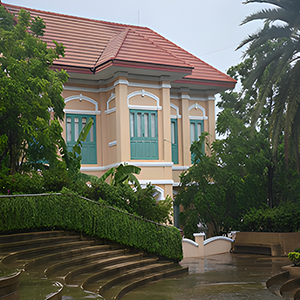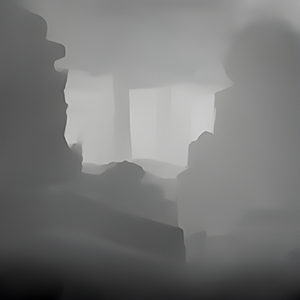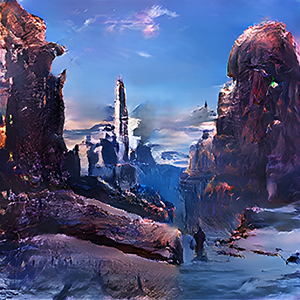

#What to do

Connect to GPU! (check under "runtime" > "change runtime type")

Then run one cell after the other and do the instructions.
There will be
*   creation of depth map from your image
*   running the model to create a fantasy landscape of it
*   upscaling the images
*   download it, if you want!







#Depth Map
(from: http://stereo.jpn.org/jpn/stphmkr/google/colabe.html)

download depthmap folder stuff:

In [1]:
!gdown --id 1HLOp55ntZjtpG3wet37fynOE4PNQSqMj -O /content/2dtodepth.zip

Downloading...
From: https://drive.google.com/uc?id=1HLOp55ntZjtpG3wet37fynOE4PNQSqMj
To: /content/2dtodepth.zip
100% 21.6M/21.6M [00:00<00:00, 81.6MB/s]


In [ ]:
!unzip /content/2dtodepth.zip -d /content/

Delete example file:

In [43]:
!rm /content/2dtodepth/infile/00003.JPG

Save the landscape picture you wanna make fantastical in ./2dtodepth/infile as a jpg file (it will eventually be made square, if it isn't already).
Make depth maps:


In [ ]:
%cd /content/2dtodepth
!python 2dtodepth.py --input=single_view

create folders for model later:

In [4]:
%cd /content/
!mkdir /content/FantasyLandscape
!mkdir /content/FantasyLandscape/test

/content


move jpgs into folder (the 3 lines are just if jpg suffix varies):

In [5]:
!cp /content/2dtodepth/outfile/*.jpg /content/FantasyLandscape/test/
!cp /content/2dtodepth/outfile/*.JPG /content/FantasyLandscape/test/
!cp /content/2dtodepth/outfile/*.jpeg /content/FantasyLandscape/test/

cp: cannot stat '/content/2dtodepth/outfile/*.jpg': No such file or directory
cp: cannot stat '/content/2dtodepth/outfile/*.jpeg': No such file or directory


#Create your Fantasy Landscape

clone pix2pix folder (check out [this github account](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more info):

In [6]:
%cd /content/
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

/content
Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2443, done.
remote: Total 2443 (delta 0), reused 0 (delta 0), pack-reused 2443
Receiving objects: 100% (2443/2443), 8.13 MiB | 30.39 MiB/s, done.
Resolving deltas: 100% (1570/1570), done.


Download latest model:

In [7]:
!mkdir /content/pytorch-CycleGAN-and-pix2pix/checkpoints
!mkdir /content/pytorch-CycleGAN-and-pix2pix/checkpoints/FantasyLandscape
!gdown --id 1IEpZOya8Njav7Ra0Iu3gH5YN9KK9nyj9 -O /content/pytorch-CycleGAN-and-pix2pix/checkpoints/FantasyLandscape/latest_net_G.pth

Downloading...
From: https://drive.google.com/uc?id=1IEpZOya8Njav7Ra0Iu3gH5YN9KK9nyj9
To: /content/pytorch-CycleGAN-and-pix2pix/checkpoints/FantasyLandscape/latest_net_G.pth
100% 218M/218M [00:01<00:00, 171MB/s]


move into pix2pix folder:

In [8]:
%cd /content/pytorch-CycleGAN-and-pix2pix

/content/pytorch-CycleGAN-and-pix2pix


Download necessary stuff to run model:

In [ ]:
!pip install -r requirements.txt

run model:

In [ ]:
!python test.py --dataroot /content/FantasyLandscape --direction BtoA --model pix2pix --name FantasyLandscape

write the original name of your file you wanna display (the files should be in /content/pytorch-CycleGAN-and-pix2pix/results/FantasyLandscape_pretrained/test_latest/images)

In [22]:
filename = "DSC_1141"

look at your results (next three cells):

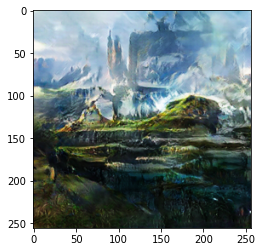

In [23]:
import matplotlib.pyplot as plt
fakeB = plt.imread('/content/pytorch-CycleGAN-and-pix2pix/results/FantasyLandscape/test_latest/images/'+ str(filename) +'_fake_B.png')
realA = plt.imread('/content/pytorch-CycleGAN-and-pix2pix/results/FantasyLandscape/test_latest/images/'+ str(filename) +'_real_A.png')
realB = plt.imread('/content/pytorch-CycleGAN-and-pix2pix/results/FantasyLandscape/test_latest/images/'+ str(filename) +'_real_B.png')

plt.imshow(fakeB)

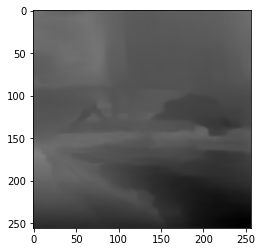

In [24]:
plt.imshow(realA)

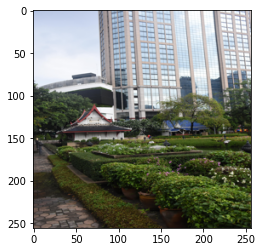

In [25]:
plt.imshow(realB)

#Upscale Result Image
(got that from https://github.com/xinntao/Real-ESRGAN, very nice)

We clone the repository, set up the envrironment, and download the pre-trained model.

In [1]:
%cd /content/

/content


In [2]:
# Clone Real-ESRGAN and enter the Real-ESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop
# Download the pre-trained model
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 558, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 558 (delta 21), reused 30 (delta 11), pack-reused 512
Receiving objects: 100% (558/558), 4.64 MiB | 5.21 MiB/s, done.
Resolving deltas: 100% (283/283), done.
/content/Real-ESRGAN
     |████████████████████████████████| 161 kB 7.2 MB/s 
     |████████████████████████████████| 5.8 MB 40.1 MB/s 
     |████████████████████████████████| 185 kB 54.3 MB/s 
  Created wheel for basicsr: filename=basicsr-1.3.4.9-py3-none-any.whl size=194439 sha256=d0396631b4a6449a4292db694c948206d7faa3058e0e2d744d9678e4c1d2bb64
  Stored in directory: /root/.cache/pip/wheels/92/52/70/341916b8c102f1e4416695e601d4aa71ba34d1080f7aa47cf5
Successfully built basicsr
     |████████████████████████████████| 56 kB 3.3 MB/s 
     |████████████████████████████████| 177 kB 14.1 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any

copy pictures to right folder

In [35]:
%cd /content/
!mkdir /content/Real-ESRGAN/upload
!cp /content/pytorch-CycleGAN-and-pix2pix/results/FantasyLandscape/test_latest/images/*.png /content/Real-ESRGAN/upload/
%cd Real-ESRGAN

/content/Real-ESRGAN


Run the model to upscale the images (original, depth map and results):

In [4]:
# if it is out of memory, try to use the `--tile` option
# We upsample the image with the scale factor X3.5
!python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 4 --half
# Arguments
# -n, --model_name: Model names
# -i, --input: input folder or image
# --outscale: Output scale, can be arbitrary scale factore. 

Testing 0 Unknown


Take a look!

In [37]:
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'upload'
result_folder = 'results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

Output hidden; open in https://colab.research.google.com to view.

#Download your results!
(also from https://github.com/xinntao/Real-ESRGAN)

In [40]:
# Download the results
from google.colab import files
zip_filename = 'Landscape_to_Fantasy_result.zip'
if os.path.exists(zip_filename):
  os.remove(zip_filename)
os.system(f"zip -r -j {zip_filename} results/*")
files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>